<a href="https://colab.research.google.com/github/JulianEspinosaUrresti/ProyectoI-MIAA-2025/blob/main/Taller_inova_pre1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**1. Importación de Librerías**

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pathlib as pl
import math
import scipy.stats as ss
from sklearn.metrics import log_loss
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                            precision_score, recall_score, f1_score, roc_curve, auc)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, het_goldfeldquandt

###**2. Cargue del Dataset**

**2.1. Acerca del Dataset**

German Credit es un dataset utilizado para evaluar modelos de riesgo crediticio.

El objetivo es predecir si un solicitante de crédito es un bueno o malo para pagar, a partir de información financiera, personal y del préstamo.

In [207]:
df=pd.read_csv('german_credit.csv',sep=";")

**2.2. Diccionario de las variables**

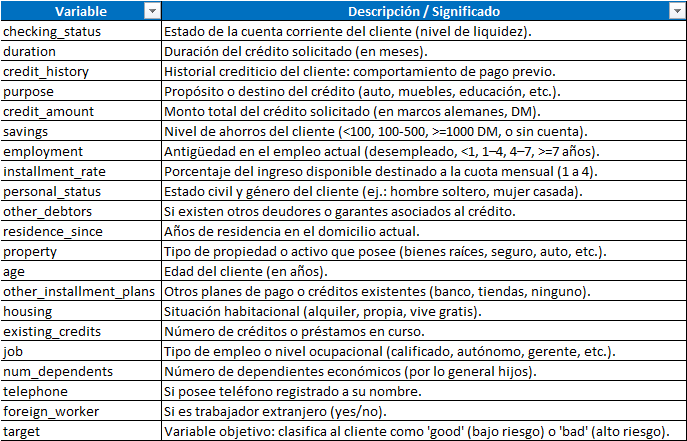

**2.3. Variable Objetivo**

La variable objetivo es "**target**", ya que expresa el comportamiento crediticio final del cliente, definiéndolo como “good” (buen pagador) o “bad” (mal pagador).

###**3. Análisis Exploratorio de Datos**



**3.1. Contenido y tamaño del DataFrame**

In [208]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,target
0,< 0 DM,6,critical account / other credits existing,radio/television,1169,unknown / no savings account,? 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customer’s name",yes,good
1,0 ? ... < 200 DM,48,existing credits paid till now,radio/television,5951,< 100 DM,1 ? ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,no,yes,bad
2,no checking account,12,critical account / other credits existing,education,2096,< 100 DM,4 ? ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,good
3,< 0 DM,42,existing credits paid till now,furniture/equipment,7882,< 100 DM,4 ? ... < 7 years,2,male : single,guarantor,...,building society savings/life insurance,45,none,for free,1,skilled employee / official,2,no,yes,good
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 ? ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,no,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid till now,furniture/equipment,1736,< 100 DM,4 ? ... < 7 years,3,female : divorced/separated/married,none,...,real estate,31,none,own,1,unskilled - resident,1,no,yes,good
996,< 0 DM,30,existing credits paid till now,car (used),3857,< 100 DM,1 ? ... < 4 years,4,male : divorced/separated,none,...,building society savings/life insurance,40,none,own,1,management / self-employed / highly qualified,1,"yes, registered under the customer’s name",yes,good
997,no checking account,12,existing credits paid till now,radio/television,804,< 100 DM,? 7 years,4,male : single,none,...,car or other,38,none,own,1,skilled employee / official,1,no,yes,good
998,< 0 DM,45,existing credits paid till now,radio/television,1845,< 100 DM,1 ? ... < 4 years,4,male : single,none,...,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customer’s name",yes,bad


**3.2. Tipo de Variables del DataFrame**

In [209]:
df.info()

numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()

print("\n====================================")
print(f"Total variables numéricas: {len(numericas)}")
print(f"Total variables categóricas: {len(categoricas)}")
print("====================================")

nulos_totales = df.isnull().sum().sum()
nulos_por_columna = df.isnull().sum()

print("\n====================================")
if nulos_totales == 0:
    print("No hay valores nulos en el DataFrame.")
else:
    print(f"Hay un total de {nulos_totales} valores nulos.")
    print("\nNulos por columna:")
    print(nulos_por_columna[nulos_por_columna > 0])
print("====================================")

duplicados = df.duplicated().sum()

print("\n====================================")
if duplicados == 0:
    print("No hay filas duplicadas en el DataFrame.")
else:
    print(f"Hay {duplicados} filas duplicadas.")
    print("Puedes verlas con: df[df.duplicated()]")
print("====================================")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   checking_status          1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amount            1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment               1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status          1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  residence_since          1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

**3.3. Estadística Descriptiva de las Variables Numéricas**

In [210]:
df.describe()

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


**3.4. Descripción de las Variables Categóricas**

In [211]:
categoricas = df.select_dtypes(include=['object']).columns.tolist()

for col in categoricas:
    categorias_unicas = df[col].unique()
    num_categorias = len(categorias_unicas)

    print(f"\n\033[1m{col}\033[0m: {num_categorias} categorías \n")

    conteos = df[col].value_counts()

    for cat, count in conteos.items():
        print(f"    * {cat}  →  {count}")


checking_status: 4 categorías 

    * no checking account  →  394
    * < 0 DM  →  274
    * 0 ? ... < 200 DM  →  269
    * ? 200 DM / salary assigned  →  63

credit_history: 5 categorías 

    * existing credits paid till now  →  530
    * critical account / other credits existing  →  293
    * delay in paying off in the past  →  88
    * all credits at this bank paid duly  →  49
    * no credits taken / all paid duly  →  40

purpose: 10 categorías 

    * radio/television  →  280
    * car (new)  →  234
    * furniture/equipment  →  181
    * car (used)  →  103
    * business  →  97
    * education  →  50
    * repairs  →  22
    * domestic appliances  →  12
    * others  →  12
    * retraining  →  9

savings: 5 categorías 

    * < 100 DM  →  603
    * unknown / no savings account  →  183
    * 100 ? ... < 500 DM  →  103
    * 500 ? ... < 1000 DM  →  63
    * ? 1000 DM  →  48

employment: 5 categorías 

    * 1 ? ... < 4 years  →  339
    * ? 7 years  →  253
    * 4 ? ... < 7 years

La variable objetivo "target" está desbalanceada, con un 70% de clientes clasificados como “good” y un 30% como “bad”.

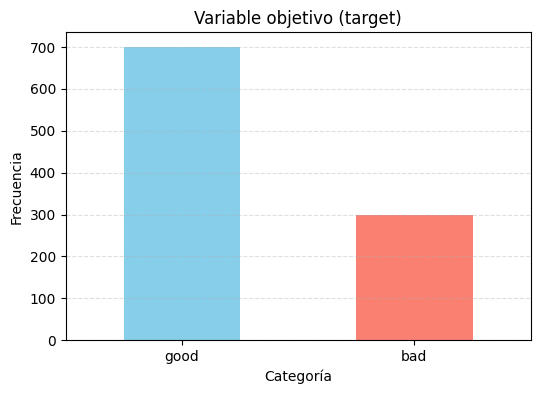

In [212]:
plt.figure(figsize=(6,4))
df['target'].value_counts().plot(kind='bar', color=['skyblue','salmon'])

plt.title("Variable objetivo (target)")
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

**3.5. Correlación de las Variables Categóricas vs. Variable Objetivo (target)**

In [213]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

target = "target"

cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

resultados = {}
for col in cat_cols:
    if col != target:
        resultados[col] = cramers_v(df[col], df[target])

cramer_df = pd.DataFrame.from_dict(resultados, orient="index", columns=["Cramers_V"])
cramer_df = cramer_df.sort_values(by="Cramers_V", ascending=False)

print(cramer_df)

                         Cramers_V
checking_status           0.347619
credit_history            0.240302
savings                   0.179240
purpose                   0.156115
property                  0.144005
housing                   0.127334
employment                0.119911
other_installment_plans   0.104154
personal_status           0.081295
foreign_worker            0.069465
other_debtors             0.068176
telephone                 0.013105
job                       0.000000


Las variables categóricas que muestran mayor asociación con la variable objetivo (target) son "**checking_status**" y "**credit_history**". Las variables "**savings**" y "**purpose**" también podrían considerarse.
Las variables "job", "telephone", "other_debtors", "foreign_worker" y "personal_status" muestran una asociación mínima con la variable objetivo (target).

**3.6. Conversión de la Variable Objetivo (target) en numérica**

In [214]:
df['target']=df['target'].map({'good':0,'bad':1})

**3.7. Conversión en dummies de las Variables Categóricas de mayor asociación con la Variable Objetivo (target)**

In [215]:
variables_dummificar = ['checking_status', 'credit_history', 'savings','purpose']

df_dummies = pd.get_dummies(df,
                            columns=variables_dummificar,
                            drop_first=True)

**3.8. Correlación de las Variables Numéricas y Dummies vs. Variable Objetivo (target)**

In [216]:
df_num = df_dummies.select_dtypes(include=['int64', 'float64', 'uint8', 'bool'])

corr_target = df_num.corr()['target'].drop('target')

corr_target_sorted = corr_target.sort_values(ascending=False)

corr_target_sorted

,target
checking_status_< 0 DM,0.258333
duration,0.214927
savings_< 100 DM,0.161007
credit_amount,0.154739
credit_history_no credits taken / all paid duly,0.144767
purpose_car (new),0.096900
installment_rate,0.072404
purpose_education,0.070088
credit_history_existing credits paid till now,0.043722
purpose_others,0.028058


**3.9. Top 10 de las Variables Numéricas y Dummies más correlacionadas con la Variable Objetivo (target)**

In [217]:
df_num = df_dummies.select_dtypes(include=['int64','float64','uint8','bool']).copy()

corr_target = df_num.corr()['target'].drop('target')

corr_abs = corr_target.abs().sort_values(ascending=False).head(10)

tabla_corr = pd.DataFrame({
    "Variable": corr_abs.index,
    "Correlación": corr_target[corr_abs.index].values,
    "Correlación_absoluta": corr_abs.values})

tabla_corr = tabla_corr.sort_values("Correlación_absoluta", ascending=False)

tabla_corr

,Variable,Correlación,Correlación_absoluta
0,checking_status_no checking account,-0.322436,0.322436
1,checking_status_< 0 DM,0.258333,0.258333
2,duration,0.214927,0.214927
3,credit_history_critical account / other credit...,-0.181713,0.181713
4,savings_< 100 DM,0.161007,0.161007
5,credit_amount,0.154739,0.154739
6,credit_history_no credits taken / all paid duly,0.144767,0.144767
7,savings_unknown / no savings account,-0.129238,0.129238
8,purpose_radio/television,-0.106922,0.106922
9,purpose_car (used),-0.099791,0.099791


**3.10. Análisis Univariado de las 10 de las Variables Numéricas y Dummies más correlacionadas con la Variable Objetivo (target)**

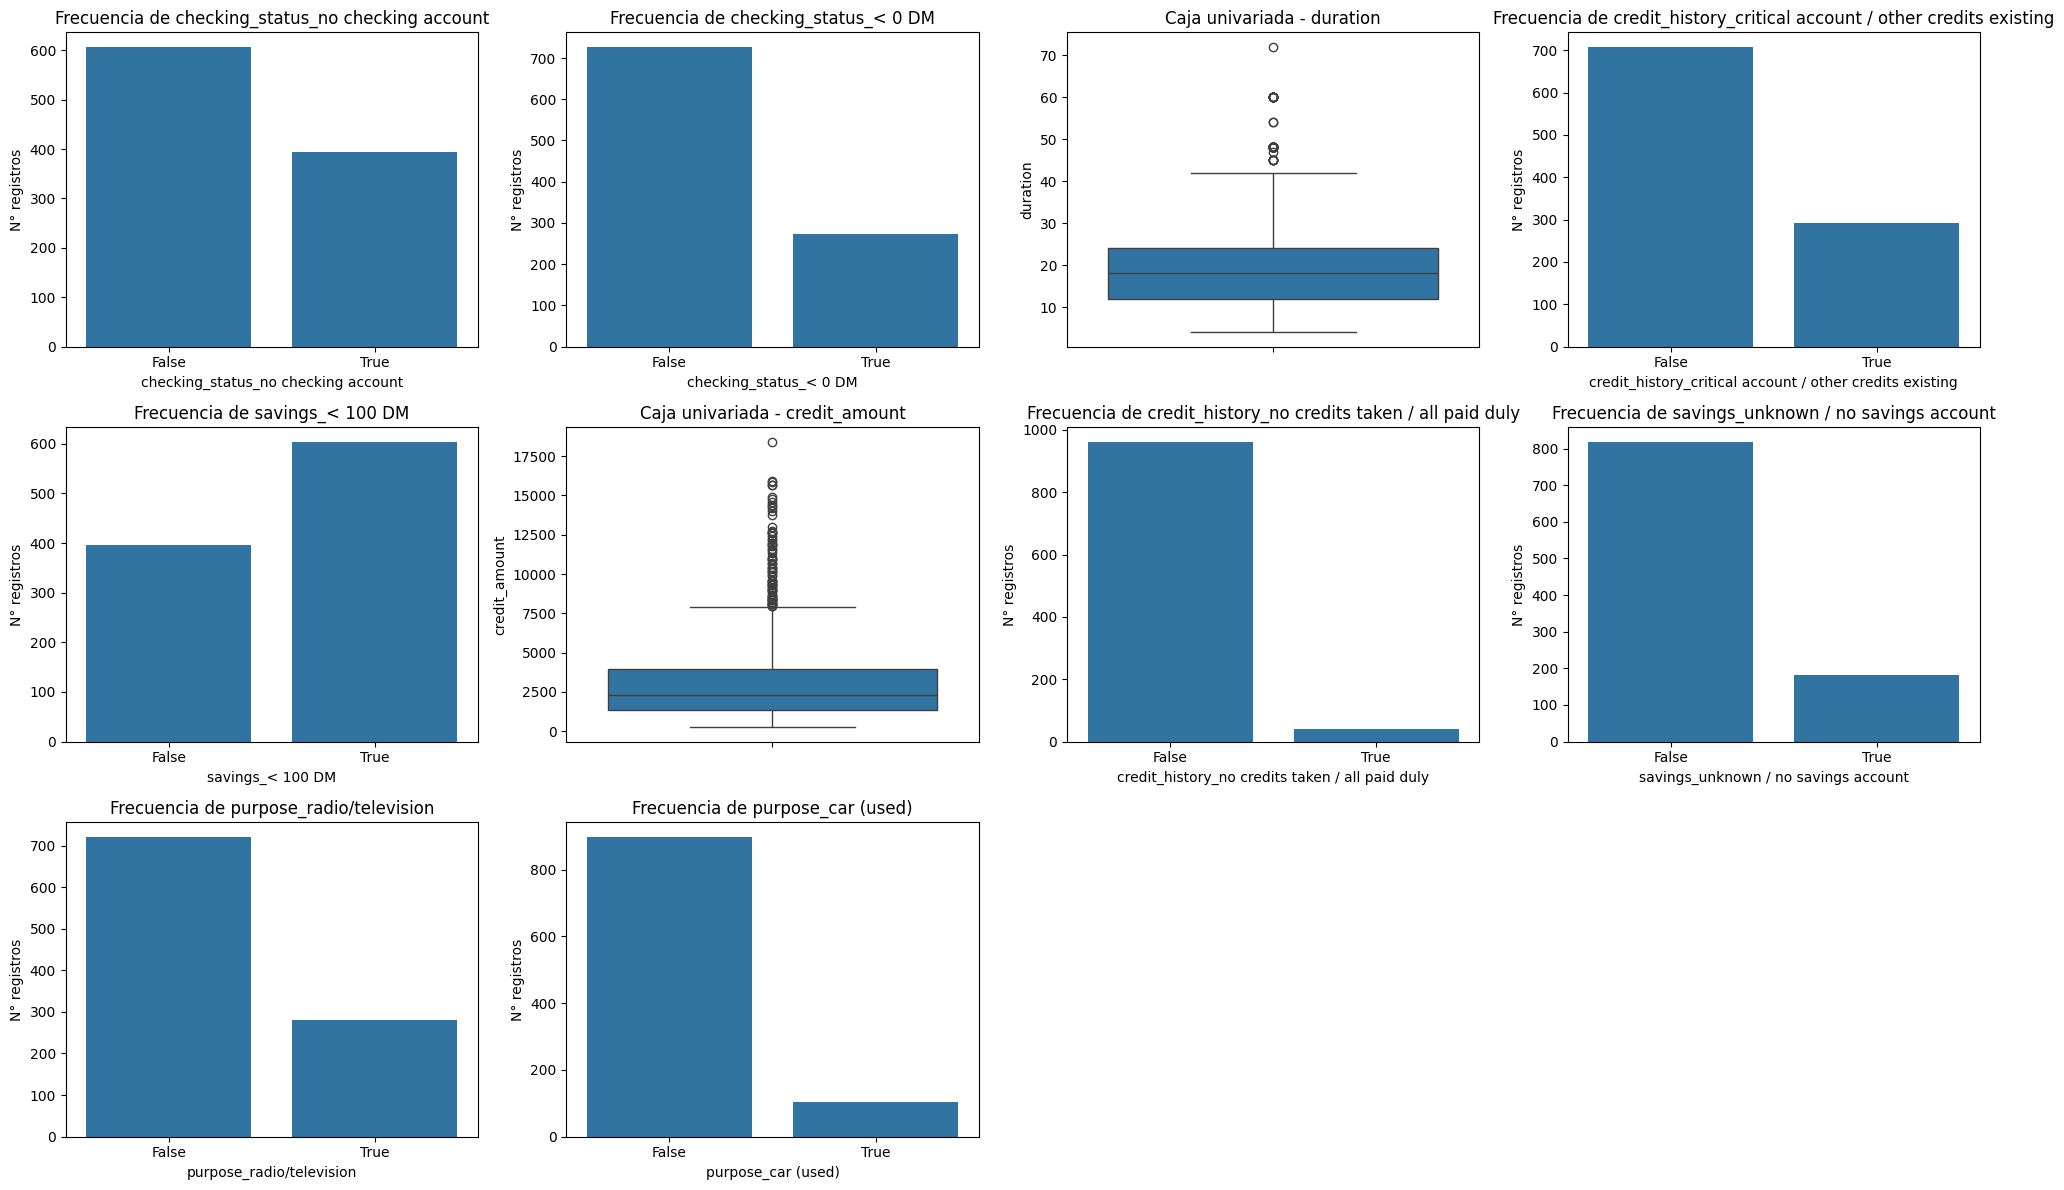

In [218]:
n = len(top_vars)

cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(top_vars):
    ax = axes[i]

    if df_num[col].nunique() <= 2:
        sns.countplot(x=col, data=df_num, ax=ax)
        ax.set_title(f"Frecuencia de {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("N° registros")
    else:
        sns.boxplot(y=df_num[col], ax=ax)
        ax.set_title(f"Caja univariada - {col}")
        ax.set_ylabel(col)

for j in range(i + 1, cols * rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**1. checking_status_no checking account:** La mayoría de los solicitantes no tienen cuenta bancaria.

**2. checking_status_< 0 DM:** la mayoría de los solicitantes NO tiene saldo negativo.

**3. duration (boxplot):** tiene mucha dispersión, con valores desde 4 hasta 70 meses. La mediana está alrededor de 18 meses. Hay outliers significativos en créditos de largo plazo.

**4. credit_history_critical account / other credits existing:** La mayoría de los solicitantes NO tienen historial crítico.

**5. savings_<100 DM:** gran parte de los solicitantes tiene ahorros menores a 100 DM.

**6. credit_amount (boxplot):** Distribución muy sesgada hacia la derecha. La mayoría de los créditos son pequeños, pero existen varios casos extremos (más de 15.000).

**7. credit_history_no credits taken / all paid duly:** la mayoría pertenece a esta categoría (historial bueno).

**8. savings_unknown / no savings account:** más de 800 solicitantes no tienen cuenta de ahorros o no reportan información.

**9. purpose_radio/television:** esta categoría domina entre las finalidades del crédito.

**10. purpose_car (used):** poco pero relevante.

**3.11. Análisis Bivariado de las 10 de las Variables Numéricas y Dummies más correlacionadas con la Variable Objetivo (target)**

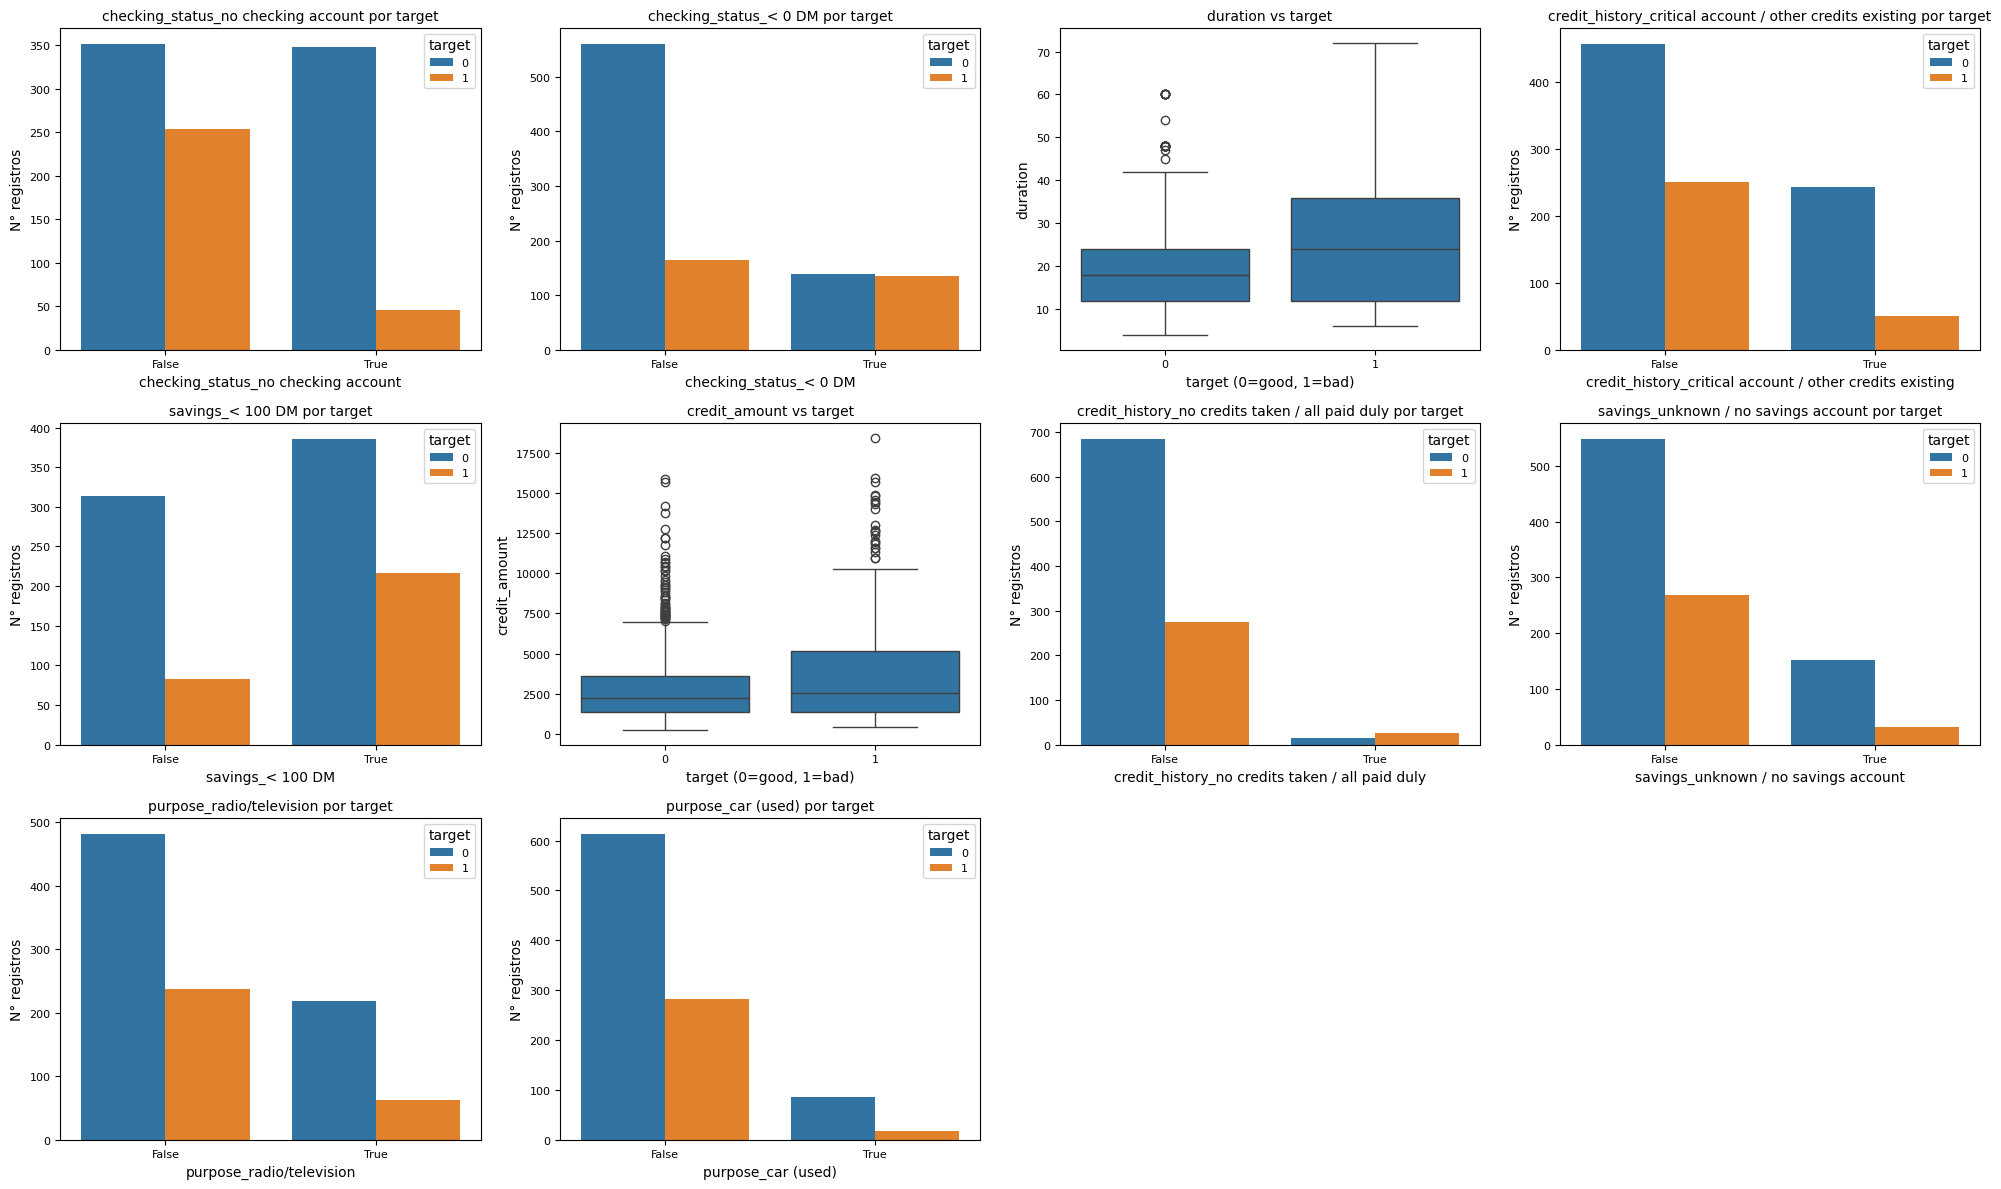

In [219]:
vars_bi = [v for v in top_vars if v != 'target']

n = len(vars_bi)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(vars_bi):
    ax = axes[i]

    if df_num[col].nunique() > 2:
        sns.boxplot(x='target', y=col, data=df_num, ax=ax)
        ax.set_title(f"{col} vs target", fontsize=10)
        ax.set_xlabel("target (0=good, 1=bad)")
        ax.set_ylabel(col)

    else:
        sns.countplot(x=col, hue='target', data=df_num, ax=ax)
        ax.set_title(f"{col} por target", fontsize=10)
        ax.set_xlabel(col)
        ax.set_ylabel("N° registros")
        ax.legend(title="target", fontsize=8)

    ax.tick_params(axis='both', labelsize=8)

for j in range(i + 1, cols * rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**1. checking_status_no checking account vs target:** los solicitantes sin cuenta bancaria (True) tienen una proporción mayor de casos “bad”.

**2. checking_status_< 0 DM vs target:** los solicitantes con saldo < 0 DM muestran mayor proporción de incumplimientos.

**3. duration vs target (boxplot):** los créditos “bad” muestran una mediana mayor en duración. Tienen un rango más amplio y más valores extremos.

**4. credit_history_critical account / other credits existing vs target:** los solicitantes con historial crítico presentan una proporción mucho mayor de “bad”.

**5. savings_< 100 DM vs target:** los solicitantes con menos de 100 DM en ahorros tienen una tasa más alta de “bad”.

**6. credit_amount vs target (boxplot):** los solicitantes “bad” tienen montos de crédito ligeramente mayores (se ve mediana más alta). Los outliers son más frecuentes en el grupo bad.

**7. credit_history_no credits taken / all paid duly vs target:** los solicitantes que están en esta categoría tienen mayor proporción de good.

**8. savings_unknown / no savings account vs target:** tener ahorros desconocidos o inexistentes incrementa la proporción de “bad”.

**9. purpose_radio/television vs target:** los solicitantes que piden crédito para consumo básico (radio/TV) tienen más casos "bad".

**10. purpose_car (used) vs target:** los créditos para carros usados muestran mayor proporción de “bad”.

###**4. Modelos**



**4.1. Modelo Logístico**

Se utiliza un modelo logístico porque predice la probabilidad de incumplimiento y permite clasificar los solicitantes.

Se estimó utilizando las 10 variables de mayor correlación con la variable objetivo (target) y adicionalmente se añadió la variable "installment_rate" (porcentaje del ingreso disponible destinado a la cuota mensual), ya que a juicio de expertos se considera importante en el análisis de riesgo crediticio.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



Reporte de Clasificación (Regresión Logística):

               precision    recall  f1-score   support

           0       0.81      0.89      0.85       210
           1       0.67      0.51      0.58        90

    accuracy                           0.78       300
   macro avg       0.74      0.70      0.71       300
weighted avg       0.77      0.78      0.77       300



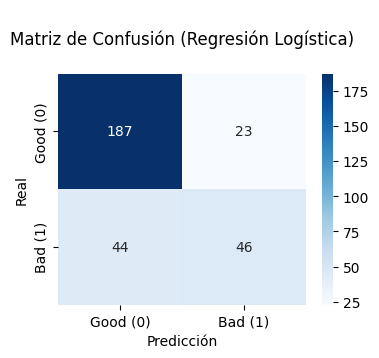

In [277]:
# Variables
X = df_dummies[['checking_status_no checking account',
    'checking_status_< 0 DM',
    'duration',
    'credit_amount',
    'installment_rate',
    'savings_< 100 DM',
    'savings_unknown / no savings account',
    'credit_history_critical account / other credits existing',
    'credit_history_no credits taken / all paid duly',
    'purpose_radio/television',
    'purpose_car (used)']]
y = df_dummies['target']

# Separamos train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Escalamos las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo logístico (multinomial)
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred = log_reg.predict(X_test_scaled)

# Reporte de métricas
print("\nReporte de Clasificación (Regresión Logística):\n\n", classification_report(y_test, y_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title("\nMatriz de Confusión (Regresión Logística)\n")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

El modelo logístico:

* Funciona bien clasificando buenos solicitantes: Alto recall = 0.89.

* Debe mejorar clasificando malos solicitantes: Recall medio = 0.51.

**4.2. Regularización con Ridge y Lasso**

Se aplican las técnicas de regularización Lasso y Ridge para evitar sobreajuste, mejore la estabilidad de los coeficientes y garantice que el modelo logístico generalice adecuadamente.

Reporte de Clasificación (Ridge - L2):

               precision    recall  f1-score   support

           0       0.81      0.89      0.85       210
           1       0.67      0.51      0.58        90

    accuracy                           0.78       300
   macro avg       0.74      0.70      0.71       300
weighted avg       0.77      0.78      0.77       300



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


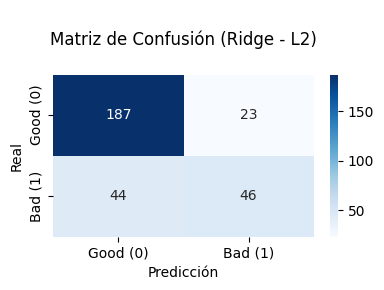

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



Reporte de Clasificación (Lasso - L1):

               precision    recall  f1-score   support

           0       0.81      0.89      0.85       210
           1       0.66      0.50      0.57        90

    accuracy                           0.77       300
   macro avg       0.73      0.70      0.71       300
weighted avg       0.76      0.77      0.76       300



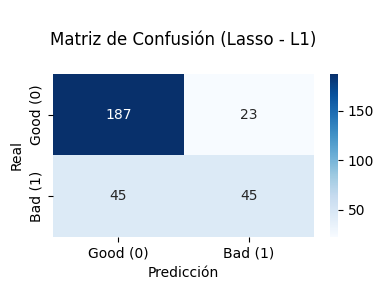

In [278]:
# Modelo con Ridge (L2)
log_reg_ridge = LogisticRegression(
    penalty='l2',          # Regularización Ridge
    solver='lbfgs',        # Compatible con L2
    multi_class='multinomial',
    C=1.0,                 # Inverso de la regularización (más bajo = más fuerte)
    max_iter=1000)

log_reg_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = log_reg_ridge.predict(X_test_scaled)

print("Reporte de Clasificación (Ridge - L2):\n\n", classification_report(y_test, y_pred_ridge))

# Matriz de Confusión - Ridge
cm_ridge = confusion_matrix(y_test, y_pred_ridge)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_ridge, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title("\nMatriz de Confusión (Ridge - L2)\n")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Modelo con Lasso (L1)
log_reg_lasso = LogisticRegression(
    penalty='l1',          # Regularización Lasso
    solver='saga',         # Necesario para L1
    multi_class='multinomial',
    C=1.0,
    max_iter=2000)

log_reg_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = log_reg_lasso.predict(X_test_scaled)

print("\nReporte de Clasificación (Lasso - L1):\n\n", classification_report(y_test, y_pred_lasso))

# Matriz de Confusión - Lasso
cm_lasso = confusion_matrix(y_test, y_pred_lasso)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_lasso, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title("\nMatriz de Confusión (Lasso - L1)\n")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

Al igual que el modelo logístico, los modelos con Ridge y Lasso:

* Funcionan bien clasificando buenos solicitantes: Alto recall = 0.89.

* Deben mejorar clasificando malos solicitantes: Recall medio = 0.51 y 0.50.

**4.3. Comparación de los Modelos Regresión Logística, Ridge y Lasso**


================ TABLA COMPARATIVA ================

                Modelo  Accuracy  Precision    Recall        F1       AUC
0  Regresión Logística  0.776667   0.666667  0.511111  0.578616  0.802593
1           Ridge (L2)  0.776667   0.666667  0.511111  0.578616  0.802593
2           Lasso (L1)  0.773333   0.661765  0.500000  0.569620  0.802275




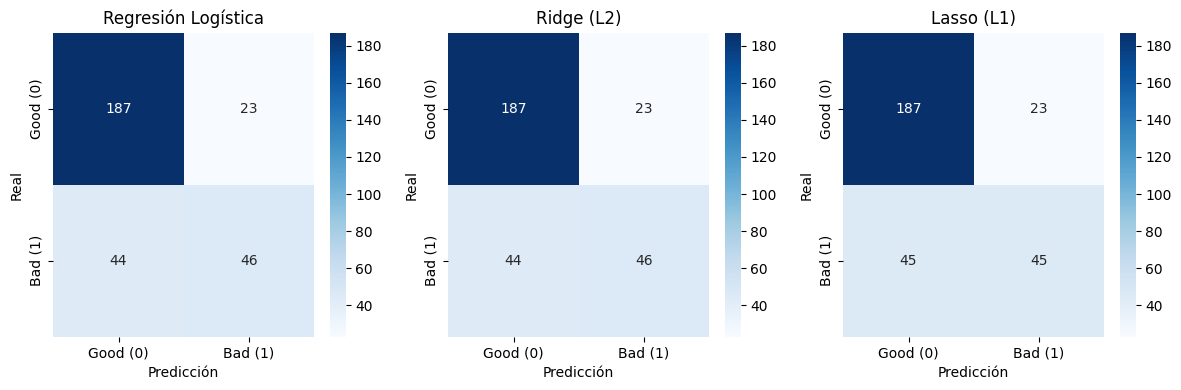

In [297]:
# Modelos entrenados
modelos = {
    "Regresión Logística": log_reg,
    "Ridge (L2)": log_reg_ridge,
    "Lasso (L1)": log_reg_lasso}

# Tabla de Comparación
resultados = []

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test_scaled)
    y_proba = modelo.predict_proba(X_test_scaled)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)

    resultados.append([nombre, acc, prec, rec, f1, auc])

tabla_modelos = pd.DataFrame(
    resultados,
    columns=["Modelo", "Accuracy", "Precision", "Recall", "F1", "AUC"])

print("\n================ TABLA COMPARATIVA ================\n")
print(tabla_modelos)
print("\n")

# Matrices de Confusión

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, (nombre, modelo) in zip(axes, modelos.items()):
    y_pred = modelo.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Good (0)', 'Bad (1)'],
                yticklabels=['Good (0)', 'Bad (1)'],
                ax=ax)
    ax.set_title(nombre)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

plt.tight_layout()
plt.show()

Los modelos Regresión Logística, Ridge y Lasso dan resultados similares.

In [304]:
variables_modelo = [
    'checking_status_no checking account',
    'checking_status_< 0 DM',
    'duration',
    'credit_amount',
    'installment_rate',
    'savings_< 100 DM',
    'savings_unknown / no savings account',
    'credit_history_critical account / other credits existing',
    'credit_history_no credits taken / all paid duly',
    'purpose_radio/television',
    'purpose_car (used)']

coef = pd.Series(log_reg_lasso.coef_[0], index=variables_modelo)

variables_eliminadas = coef[coef == 0].index.tolist()

print("Variables eliminadas por Lasso:")
print(variables_eliminadas)

Variables eliminadas por Lasso:
[]


Lasso no está eliminando variables, por lo cual se presume que la selección de variables fue buena y/o no hay multicolinealidad.

**4.3. Árbol de Decisión**


Reporte de Clasificación (Árbol de Decisión)

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       210
           1       0.56      0.41      0.47        90

    accuracy                           0.73       300
   macro avg       0.67      0.64      0.64       300
weighted avg       0.71      0.73      0.71       300

Accuracy: 0.7267
Precision: 0.5606
Recall: 0.4111
F1-score: 0.4744
AUC: 0.7457


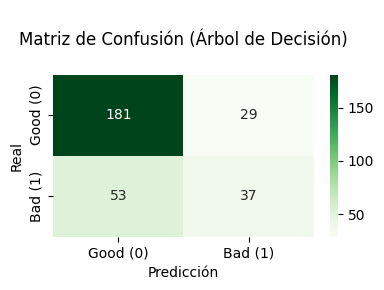


Importancia de Variables (Árbol de Decisión)

                                             Variable  Importancia
0                 checking_status_no checking account     0.361923
3                                       credit_amount     0.203713
2                                            duration     0.189607
5                                    savings_< 100 DM     0.110740
4                                    installment_rate     0.050113
7   credit_history_critical account / other credit...     0.036536
10                                 purpose_car (used)     0.025400
6                savings_unknown / no savings account     0.021969
1                              checking_status_< 0 DM     0.000000
8     credit_history_no credits taken / all paid duly     0.000000
9                            purpose_radio/television     0.000000


In [315]:
# Variables
X_tree = df_dummies[[
    'checking_status_no checking account',
    'checking_status_< 0 DM',
    'duration',
    'credit_amount',
    'installment_rate',
    'savings_< 100 DM',
    'savings_unknown / no savings account',
    'credit_history_critical account / other credits existing',
    'credit_history_no credits taken / all paid duly',
    'purpose_radio/television',
    'purpose_car (used)']]

y_tree = df_dummies['target']
if y_tree.dtype == 'object':
    y_tree = y_tree.map({'good': 0, 'bad': 1})

# Split SOLO para el árbol (sin escalar)
Xtr_tree, Xte_tree, ytr_tree, yte_tree = train_test_split(
    X_tree, y_tree, test_size=0.3, random_state=42, stratify=y_tree)

# Modelo
arbol = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42)

# Entrenamiento
arbol.fit(Xtr_tree, ytr_tree)

# Predicciones
y_pred_tree = arbol.predict(Xte_tree)
y_proba_tree = arbol.predict_proba(Xte_tree)[:, 1]

# Métricas
print("\nReporte de Clasificación (Árbol de Decisión)\n")
print(classification_report(yte_tree, y_pred_tree))

accuracy = accuracy_score(yte_tree, y_pred_tree)
precision = precision_score(yte_tree, y_pred_tree)
recall = recall_score(yte_tree, y_pred_tree)
f1 = f1_score(yte_tree, y_pred_tree)
auc = roc_auc_score(yte_tree, y_proba_tree)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Matriz de Confusión
cm_tree = confusion_matrix(yte_tree, y_pred_tree)

plt.figure(figsize=(4,3))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title("\nMatriz de Confusión (Árbol de Decisión)\n")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Importancia de variables
importances = pd.DataFrame({
    "Variable": X_tree.columns,
    "Importancia": arbol.feature_importances_
}).sort_values("Importancia", ascending=False)

print("\nImportancia de Variables (Árbol de Decisión)\n")
print(importances)

In [281]:
X = df.drop(columns=['target'])
y = df['target']

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaños:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("Categóricas:", len(categorical_features), "Numéricas:", len(numeric_features))

Tamaños:
X_train: (700, 20) X_test: (300, 20)
Categóricas: 13 Numéricas: 7


In [305]:
# Los resultados del modelo de árbol de decisión no son mejores que los resultados del modelo logístico

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import pandas as pd

# Definición del modelo
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Crear el pipeline
pipe = Pipeline(steps=[('preprocess', preprocessor), ('model', clf)])

# Entrenamiento del modelo
pipe.fit(X_train, y_train)

# Predicciones
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]  # probabilidades para calcular ROC-AUC

# Métricas
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1  = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Resultados en DataFrame
results_df = pd.DataFrame([['DecisionTree', acc, rec, f1, auc]],
                          columns=['Modelo','Accuracy','Recall','F1','ROC_AUC'])

# Reporte detallado
print("\n Decision Tree ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Decision Tree 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       210
           1       0.42      0.43      0.43        90

    accuracy                           0.65       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.66      0.65      0.65       300

Confusion Matrix:
 [[157  53]
 [ 51  39]]


In [ ]:
# ============================================
# Modelo con XGBoost (XGBClassifier)
# ============================================

# Si no tienes instalado XGBoost, primero ejecuta:
# !pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Usamos las mismas X, y, preprocessor, X_train, X_test, y_train, y_test
# definidos en la celda del Árbol de Decisión

xgb_clf = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Creamos el pipeline con el preprocesamiento + XGBoost
pipe_xgb = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', xgb_clf)
])

# Entrenamiento
pipe_xgb.fit(X_train, y_train)

# Predicciones
y_pred_xgb  = pipe_xgb.predict(X_test)
y_proba_xgb = pipe_xgb.predict_proba(X_test)[:, 1]

# Métricas
acc_xgb = accuracy_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb  = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

print("\n=== XGBoost ===")
print("Accuracy: ", acc_xgb)
print("Recall:   ", rec_xgb)
print("F1:       ", f1_xgb)
print("ROC AUC:  ", auc_xgb)

print("\nReporte de clasificación (XGBoost):\n")
print(classification_report(y_test, y_pred_xgb))

print("Matriz de confusión (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

# Si ya tienes un DataFrame 'results_df' del árbol de decisión,
# lo ampliamos para incluir XGBoost:
try:
    results_xgb = pd.DataFrame(
        [['XGBoost', acc_xgb, rec_xgb, f1_xgb, auc_xgb]],
        columns=['Modelo','Accuracy','Recall','F1','ROC_AUC']
    )
    results_df = pd.concat([results_df, results_xgb], ignore_index=True)
    results_df
except NameError:
    # Si no existe results_df, lo creamos desde cero
    results_df = pd.DataFrame(
        [['XGBoost', acc_xgb, rec_xgb, f1_xgb, auc_xgb]],
        columns=['Modelo','Accuracy','Recall','F1','ROC_AUC']
    )
    results_df

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, recall_score

# Balanceo de clases
n0 = sum(y_train == 0)
n1 = sum(y_train == 1)
scale_pos_weight = n0 / n1
print("scale_pos_weight =", scale_pos_weight)

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    tree_method='hist',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

pipe_xgb_opt = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', xgb)
])

# 🚀 GRID REDUCIDO: solo 16 combinaciones
param_grid_small = {
    'model__max_depth': [3, 4],
    'model__learning_rate': [0.05, 0.1],
    'model__min_child_weight': [1, 3],
    'model__subsample': [0.8],
    'model__colsample_bytree': [0.8],
    'model__n_estimators': [200, 300]
}

grid = GridSearchCV(
    estimator=pipe_xgb_opt,
    param_grid=param_grid_small,
    scoring=make_scorer(recall_score),
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("\nMEJORES PARÁMETROS:")
print(grid.best_params_)

best_xgb = grid.best_estimator_

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

y_pred_opt = best_xgb.predict(X_test)
y_proba_opt = best_xgb.predict_proba(X_test)[:, 1]

print("\n=== XGBoost Optimizado (grid reducido) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_opt))
print("Recall:", recall_score(y_test, y_pred_opt))
print("F1:", f1_score(y_test, y_pred_opt))
print("AUC:", roc_auc_score(y_test, y_proba_opt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_opt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_opt))

In [ ]:
# ============================================
# BÚSQUEDA DEL MEJOR UMBRAL PARA XGBOOST OPTIMIZADO
# ============================================

import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, precision_score, f1_score

# Probabilidades del modelo optimizado
y_proba_opt = best_xgb.predict_proba(X_test)[:, 1]

umbrales = np.linspace(0.10, 0.90, 41)  # 41 umbrales (cada 0.02)
metricas = []

for u in umbrales:
    y_pred_u = (y_proba_opt >= u).astype(int)

    rec = recall_score(y_test, y_pred_u)
    prec = precision_score(y_test, y_pred_u)
    f1 = f1_score(y_test, y_pred_u)

    metricas.append([u, prec, rec, f1])

tabla_umbral = pd.DataFrame(metricas, columns=["Umbral", "Precision", "Recall", "F1"])
tabla_umbral

In [ ]:
# Mejor umbral para MAXIMIZAR RECALL
best_recall_row = tabla_umbral.loc[tabla_umbral["Recall"].idxmax()]

# Mejor umbral para MAXIMIZAR F1
best_f1_row = tabla_umbral.loc[tabla_umbral["F1"].idxmax()]

best_recall_row, best_f1_row

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report

umbral_final = 0.36  # umbral elegido según mejor F1
y_pred_final = (y_proba_opt >= umbral_final).astype(int)

print(f"=== XGBoost optimizado con umbral {umbral_final} ===")
print("Accuracy :", accuracy_score(y_test, y_pred_final))
print("Precision:", precision_score(y_test, y_pred_final))
print("Recall   :", recall_score(y_test, y_pred_final))
print("F1       :", f1_score(y_test, y_pred_final))
print("AUC      :", roc_auc_score(y_test, y_proba_opt))  # no depende del umbral

print("\nClassification report:\n", classification_report(y_test, y_pred_final))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_final))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# ============================================
# Regresión Logística BALANCEADA
# ============================================

log_bal = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='lbfgs'  # o 'liblinear' si da advertencia
)

pipe_log_bal = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', log_bal)
])

# Entrenamiento
pipe_log_bal.fit(X_train, y_train)

# Predicciones
y_pred_log_bal  = pipe_log_bal.predict(X_test)
y_proba_log_bal = pipe_log_bal.predict_proba(X_test)[:, 1]

print("=== Logístico BALANCEADO ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log_bal))
print("Recall  :", recall_score(y_test, y_pred_log_bal))
print("F1      :", f1_score(y_test, y_pred_log_bal))
print("AUC     :", roc_auc_score(y_test, y_proba_log_bal))

print("\nClassification report:\n", classification_report(y_test, y_pred_log_bal))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_log_bal))

In [ ]:
y_proba_log_bal = pipe_log_bal.predict_proba(X_test)[:, 1]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

umbrales = np.linspace(0.10, 0.90, 41)
metricas_log_bal = []

for u in umbrales:
    y_pred_u = (y_proba_log_bal >= u).astype(int)
    prec = precision_score(y_test, y_pred_u)
    rec  = recall_score(y_test, y_pred_u)
    f1   = f1_score(y_test, y_pred_u)
    metricas_log_bal.append([u, prec, rec, f1])

tabla_umbral_log = pd.DataFrame(metricas_log_bal,
                                columns=["Umbral","Precision","Recall","F1"])
tabla_umbral_log

In [ ]:
best_recall_log = tabla_umbral_log.loc[tabla_umbral_log["Recall"].idxmax()]
best_f1_log     = tabla_umbral_log.loc[tabla_umbral_log["F1"].idxmax()]

best_recall_log, best_f1_log

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

umbral_log_final = float(best_f1_log["Umbral"])
y_pred_log_final = (y_proba_log_bal >= umbral_log_final).astype(int)

print(f"=== Logístico balanceado con umbral {umbral_log_final:.2f} ===")
print("Accuracy :", accuracy_score(y_test, y_pred_log_final))
print("Precision:", precision_score(y_test, y_pred_log_final))
print("Recall   :", recall_score(y_test, y_pred_log_final))
print("F1       :", f1_score(y_test, y_pred_log_final))
print("AUC      :", roc_auc_score(y_test, y_proba_log_bal))
print("\nClassification report:\n", classification_report(y_test, y_pred_log_final))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_log_final))

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# SMOTE + Logístico balanceado
log_smote = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='lbfgs'
)

pipe_log_smote = ImbPipeline(steps=[
    ('preprocess', preprocessor),  # mismo preprocesador que has usado
    ('smote', SMOTE(random_state=42)),
    ('model', log_smote)
])

pipe_log_smote.fit(X_train, y_train)

y_pred_smote  = pipe_log_smote.predict(X_test)
y_proba_smote = pipe_log_smote.predict_proba(X_test)[:, 1]

print("=== Logístico + SMOTE ===")
print("Accuracy :", accuracy_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote))
print("Recall   :", recall_score(y_test, y_pred_smote))
print("F1       :", f1_score(y_test, y_pred_smote))
print("AUC      :", roc_auc_score(y_test, y_proba_smote))
print("\nClassification report:\n", classification_report(y_test, y_pred_smote))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_smote))

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

def resumen_modelo(nombre, y_true, y_pred, y_score):
    acc = accuracy_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_score)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return [nombre, acc, rec, prec, f1, auc, tn, fp, fn, tp]

resumenes = []

# 1. Logístico "normal" (si lo tienes, sino comenta estas dos líneas)
# y_pred_log = pipe_log.predict(X_test)
# y_proba_log = pipe_log.predict_proba(X_test)[:,1]
# resumenes.append(resumen_modelo("Logístico", y_test, y_pred_log, y_proba_log))

# 2. Logístico BALANCEADO
resumenes.append(resumen_modelo("Logístico balanceado",
                                y_test, y_pred_log_bal, y_proba_log_bal))

# 3. Logístico balanceado + UMBRAL
resumenes.append(resumen_modelo(f"Logístico bal. (umbral={umbral_log_final:.2f})",
                                y_test, y_pred_log_final, y_proba_log_bal))

# 4. Logístico + SMOTE
resumenes.append(resumen_modelo("Logístico + SMOTE",
                                y_test, y_pred_smote, y_proba_smote))

# 5. XGBoost base
resumenes.append(resumen_modelo("XGBoost base",
                                y_test, y_pred_xgb, y_proba_xgb))

# 6. XGBoost optimizado (umbral 0.5)
resumenes.append(resumen_modelo("XGBoost optimizado (0.5)",
                                y_test, y_pred_opt, y_proba_opt))

# 7. XGBoost optimizado + umbral 0.36
resumenes.append(resumen_modelo("XGBoost opt (umbral=0.36)",
                                y_test, y_pred_final, y_proba_opt))

cols = ["Modelo","Accuracy","Recall","Precision","F1","AUC","TN","FP","FN","TP"]
tabla_final_modelos = pd.DataFrame(resumenes, columns=cols)
tabla_final_modelos

In [ ]:
!pip install lightgbm catboost

In [ ]:
import numpy as np

n0 = sum(y_train == 0)
n1 = sum(y_train == 1)
scale_pos_weight = n0 / n1
n0, n1, scale_pos_weight

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# LightGBM con pesos balanceados
lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,          # -1 = sin límite, pero controlado por otros params
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    random_state=42
)

pipe_lgbm = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', lgbm)
])

pipe_lgbm.fit(X_train, y_train)

y_pred_lgbm  = pipe_lgbm.predict(X_test)
y_proba_lgbm = pipe_lgbm.predict_proba(X_test)[:, 1]

print("=== LightGBM ===")
print("Accuracy :", accuracy_score(y_test, y_pred_lgbm))
print("Recall   :", recall_score(y_test, y_pred_lgbm))
print("Precision:", precision_score(y_test, y_pred_lgbm))
print("F1       :", f1_score(y_test, y_pred_lgbm))
print("AUC      :", roc_auc_score(y_test, y_proba_lgbm))
print("\nClassification report:\n", classification_report(y_test, y_pred_lgbm))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_lgbm))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

pipe_rf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', rf)
])

pipe_rf.fit(X_train, y_train)

y_pred_rf  = pipe_rf.predict(X_test)
y_proba_rf = pipe_rf.predict_proba(X_test)[:, 1]

print("=== Random Forest optimizado ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("F1       :", f1_score(y_test, y_pred_rf))
print("AUC      :", roc_auc_score(y_test, y_proba_rf))
print("\nClassification report:\n", classification_report(y_test, y_pred_rf))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

pipe_gb = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', gb)
])

pipe_gb.fit(X_train, y_train)

y_pred_gb  = pipe_gb.predict(X_test)
y_proba_gb = pipe_gb.predict_proba(X_test)[:, 1]

print("=== Gradient Boosting ===")
print("Accuracy :", accuracy_score(y_test, y_pred_gb))
print("Recall   :", recall_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("F1       :", f1_score(y_test, y_pred_gb))
print("AUC      :", roc_auc_score(y_test, y_proba_gb))
print("\nClassification report:\n", classification_report(y_test, y_pred_gb))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_gb))

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=400,
    learning_rate=0.05,
    depth=5,
    loss_function='Logloss',
    eval_metric='AUC',
    scale_pos_weight=scale_pos_weight,
    verbose=False,
    random_seed=42
)

pipe_cat = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', cat)
])

pipe_cat.fit(X_train, y_train)

y_pred_cat  = pipe_cat.predict(X_test)
y_proba_cat = pipe_cat.predict_proba(X_test)[:, 1]

print("=== CatBoost ===")
print("Accuracy :", accuracy_score(y_test, y_pred_cat))
print("Recall   :", recall_score(y_test, y_pred_cat))
print("Precision:", precision_score(y_test, y_pred_cat))
print("F1       :", f1_score(y_test, y_pred_cat))
print("AUC      :", roc_auc_score(y_test, y_proba_cat))
print("\nClassification report:\n", classification_report(y_test, y_pred_cat))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_cat))

In [ ]:
# LightGBM
resumenes.append(resumen_modelo("LightGBM",
                                y_test, y_pred_lgbm, y_proba_lgbm))

# CatBoost
resumenes.append(resumen_modelo("CatBoost",
                                y_test, y_pred_cat, y_proba_cat))

# Random Forest optimizado
resumenes.append(resumen_modelo("Random Forest opt",
                                y_test, y_pred_rf, y_proba_rf))

# Gradient Boosting
resumenes.append(resumen_modelo("Gradient Boosting",
                                y_test, y_pred_gb, y_proba_gb))

tabla_final_modelos = pd.DataFrame(resumenes, columns=cols)
tabla_final_modelos.sort_values("Recall", ascending=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Probabilidades de cada modelo
# Logístico balanceado (con y sin umbral comparten estas probabilidades)
# Asegúrate de tener esto definido antes:
# y_proba_log_bal = pipe_log_bal.predict_proba(X_test)[:, 1]

# XGBoost optimizado (umbral 0.36 usa estas mismas probabilidades)
# Asegúrate de tener esto definido antes:
# y_proba_opt = best_xgb.predict_proba(X_test)[:, 1]

# === CURVAS ROC ===
fpr_log, tpr_log, thr_log = roc_curve(y_test, y_proba_log_bal)
fpr_xgb, tpr_xgb, thr_xgb = roc_curve(y_test, y_proba_opt)

auc_log = auc(fpr_log, tpr_log)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Puntos de operación (umbrales) para marcar en la curva ROC
def punto_umbral(fpr, tpr, thr, umbral):
    idx = np.argmin(np.abs(thr - umbral))
    return fpr[idx], tpr[idx]

fpr_log_050, tpr_log_050 = punto_umbral(fpr_log, tpr_log, thr_log, 0.50)
fpr_log_042, tpr_log_042 = punto_umbral(fpr_log, tpr_log, thr_log, 0.42)
fpr_xgb_036, tpr_xgb_036 = punto_umbral(fpr_xgb, tpr_xgb, thr_xgb, 0.36)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logístico balanceado (AUC = {auc_log:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost opt (AUC = {auc_xgb:.3f})")

# Puntos de operación
plt.scatter(fpr_log_050, tpr_log_050, marker="o", label="Logístico (umbral=0.50)")
plt.scatter(fpr_log_042, tpr_log_042, marker="s", label="Logístico (umbral=0.42)")
plt.scatter(fpr_xgb_036, tpr_xgb_036, marker="^", label="XGBoost (umbral=0.36)")

plt.plot([0,1],[0,1],'--',label="Línea azar")
plt.xlabel("Tasa de falsos positivos (1 - Especificidad)")
plt.ylabel("Tasa de verdaderos positivos (Recall)")
plt.title("Curvas ROC - Mejores modelos")
plt.legend()
plt.grid(True)
plt.show()

# === CURVAS PRECISION–RECALL ===
prec_log, rec_log, thr_pr_log = precision_recall_curve(y_test, y_proba_log_bal)
prec_xgb, rec_xgb, thr_pr_xgb = precision_recall_curve(y_test, y_proba_opt)

# Para marcar los umbrales en PR:
def punto_umbral_pr(prec, rec, thr, umbral):
    # thr tiene tamaño len-1 respecto a prec/rec
    idx = np.argmin(np.abs(thr - umbral))
    return prec[idx], rec[idx]

prec_log_050, rec_log_050 = punto_umbral_pr(prec_log, rec_log, thr_pr_log, 0.50)
prec_log_042, rec_log_042 = punto_umbral_pr(prec_log, rec_log, thr_pr_log, 0.42)
prec_xgb_036, rec_xgb_036 = punto_umbral_pr(prec_xgb, rec_xgb, thr_pr_xgb, 0.36)

plt.figure(figsize=(8,6))
plt.plot(rec_log, prec_log, label="Logístico balanceado")
plt.plot(rec_xgb, prec_xgb, label="XGBoost optimizado")

plt.scatter(rec_log_050, prec_log_050, marker="o", label="Logístico (umbral=0.50)")
plt.scatter(rec_log_042, prec_log_042, marker="s", label="Logístico (umbral=0.42)")
plt.scatter(rec_xgb_036, prec_xgb_036, marker="^", label="XGBoost (umbral=0.36)")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curvas Precision–Recall - Mejores modelos")
plt.legend()
plt.grid(True)
plt.show()